In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [108]:
path = "/content/drive/MyDrive/OSU/Academic Resource/Assignments/ML/HW4/"
data_path = "/content/drive/MyDrive/"

In [109]:
train_data = pd.read_excel(data_path + "Asssignment4_Data.xlsx", "Train")
test_data = pd.read_excel(data_path + "Asssignment4_Data.xlsx", "Test")



---

# Question 1

---



In [110]:
train_data

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,1,4.9176,1.0,3.4720,0.998,1.0,7,4,42,Apartment
1,2,5.0208,1.0,3.5310,1.500,2.0,7,4,62,House
2,3,4.5429,1.0,2.2750,1.175,1.0,6,3,40,Condo
3,4,4.5573,1.0,4.0500,1.232,1.0,6,3,54,Apartment
4,5,5.0597,1.0,4.4550,1.121,1.0,6,3,42,Apartment
5,6,3.8910,1.0,4.4550,0.988,1.0,6,3,56,Condo
6,7,5.8980,1.0,5.8500,1.240,1.0,7,3,51,Condo
7,8,5.6039,1.0,9.5200,1.501,0.0,6,3,32,House
8,9,16.4202,2.5,9.8000,3.420,2.0,10,5,42,Condo
9,10,14.4598,2.5,12.8000,3.000,2.0,9,5,14,Apartment


In [111]:
test_data

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,24,6.0931,1.5,6.7265,1.652,1.0,6,3,44,Apartment
1,25,8.3607,1.5,9.1500,1.777,2.0,8,4,48,House
2,26,8.1400,1.0,8.0000,1.504,2.0,7,3,3,House
3,27,9.1416,1.5,7.3262,1.831,1.5,8,4,31,Apartment
4,28,12.0000,1.5,5.0000,1.200,2.0,6,3,30,Apartment




---





---

**Question 1.1**

---



In [112]:
d = {
    'Target': ['Apartment', 'House', 'Condo'],
    'Frequency': [7, 7, 6],
    'Probability of Occurrence': [7/20, 7/20, 6/20]
}
df = pd.DataFrame(data=d)
df

,Target,Frequency,Probability of Occurrence
0,Apartment,7,0.35
1,House,7,0.35
2,Condo,6,0.30


In [113]:
def display_table_for_feature(mean, variance, feature):
  d = {
    'Target': ['Apartment', 'House', 'Condo'],
    'Mean': mean,
    'Variance': variance
  }
  df = pd.DataFrame(data=d)
  print(feature)
  return df

In [114]:
display_table_for_feature(mean=[7.333, 5.76, 7.4159], variance=[11.208, 0.279, 17.719], feature="Local Price")

Local Price


,Target,Mean,Variance
0,Apartment,7.3330,11.208
1,House,5.7600,0.279
2,Condo,7.4159,17.719


In [115]:
display_table_for_feature(mean=[1.2857, 1.0714, 1.2857], variance=[0.2755, 0.0306, 0.2755], feature="Bathrooms")

Bathrooms


,Target,Mean,Variance
0,Apartment,1.2857,0.2755
1,House,1.0714,0.0306
2,Condo,1.2857,0.2755


In [116]:
display_table_for_feature(mean=[6.103, 6.6309, 6.0247], variance=[10.6178, 5.0578, 6.4758], feature="Land Area")

Land Area


,Target,Mean,Variance
0,Apartment,6.1030,10.6178
1,House,6.6309,5.0578
2,Condo,6.0247,6.4758


In [117]:
display_table_for_feature(mean=[1.505, 1.3917, 1.5533], variance=[0.4958, 0.0453, 0.8648], feature="Living area")

Living area


,Target,Mean,Variance
0,Apartment,1.5050,0.4958
1,House,1.3917,0.0453
2,Condo,1.5533,0.8648


In [118]:
display_table_for_feature(mean=[1.2142, 1.0714, 1.33], variance=[0.4881, 0.7023, 0.267], feature="# Garages")

# Garages


,Target,Mean,Variance
0,Apartment,1.2142,0.4881
1,House,1.0714,0.7023
2,Condo,1.3300,0.2670


In [119]:
display_table_for_feature(mean=[6.8571, 6.1429, 6.833], variance=[1.8095, 0.4762, 2.567], feature="# Rooms")

# Rooms


,Target,Mean,Variance
0,Apartment,6.8571,1.8095
1,House,6.1429,0.4762
2,Condo,6.8330,2.5670


In [120]:
display_table_for_feature(mean=[3.4287, 3, 3.333], variance=[0.9524, 0.333, 0.667], feature="# Bedrooms")

# Bedrooms


,Target,Mean,Variance
0,Apartment,3.4287,0.9524
1,House,3.0000,0.3330
2,Condo,3.3330,0.6670


In [121]:
display_table_for_feature(mean=[38.714, 34.2857, 39.667], variance=[215.5714, 161.9048, 194.667], feature="Age of home")

Age of home


,Target,Mean,Variance
0,Apartment,38.7140,215.5714
1,House,34.2857,161.9048
2,Condo,39.6670,194.6670




---

**Question 1.2**

---



In [122]:
test_data

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,24,6.0931,1.5,6.7265,1.652,1.0,6,3,44,Apartment
1,25,8.3607,1.5,9.1500,1.777,2.0,8,4,48,House
2,26,8.1400,1.0,8.0000,1.504,2.0,7,3,3,House
3,27,9.1416,1.5,7.3262,1.831,1.5,8,4,31,Apartment
4,28,12.0000,1.5,5.0000,1.200,2.0,6,3,30,Apartment


In [123]:
def perform_nb_classification(data):
  class_list = []
  for i in range(len(data)):
    row = data.iloc[i]

    local_price_apt = (0.5836 * np.exp(-0.0446 * (row['Local Price'] - 7.333)**2))
    bathroom_apt = (0.5506 * np.exp(-1.8149 * (row['Bathrooms'] - 1.2857)**2))
    land_area_apt = (0.2209 * np.exp(-0.047 * (row['Land Area'] - 6.103)**2))
    living_area_apt = (0.4754 * np.exp(-1.008 * (row['Living area'] - 1.505)**2))
    num_garages_apt = (0.4773 * np.exp(-1.024 * (row['# Garages'] - 1.2142)**2))
    num_rooms_apt = (0.3439 * np.exp(-0.3717 * (row['# Rooms'] - 6.8571)**2))
    num_bedrooms_apt = (0.4088 * np.exp(-0.5123 * (row['# Bedrooms'] - 3.4287)**2))
    age_of_home_apt = (0.0272 * np.exp(-0.034 * (row['Age of home'] - 38.714)**2))

    prob_apt = (local_price_apt * bathroom_apt * land_area_apt * 
                living_area_apt * num_garages_apt * num_rooms_apt * 
                num_bedrooms_apt * age_of_home_apt) * (7/20)
    print(f"The probability that test data {i} is apartment is {prob_apt}")

    local_price_house = (0.5489 * np.exp(-1.792 * (row['Local Price'] - 5.76)**2))
    bathroom_house = (0.5506 * np.exp(-1.8149 * (row['Bathrooms'] - 1.2857)**2))
    land_area_house = (0.266 * np.exp(-0.098 * (row['Land Area'] - 6.6309)**2))
    living_area_house = (0.8648 * np.exp(-11.038 * (row['Living area'] - 1.3917)**2))
    num_garages_house = (0.4358 * np.exp(-0.7119 * (row['# Garages'] - 1.0714)**2))
    num_rooms_house = (0.5781 * np.exp(-0.7246 * (row['# Rooms'] - 6.1429)**2))
    num_bedrooms_house = (0.6909 * np.exp(-0.866 * (row['# Bedrooms'] - 3)**2))
    age_of_home_house = (0.0313 * np.exp(-0.0393 * (row['Age of home'] - 34.2857)**2))

    prob_house = (local_price_house * bathroom_house * land_area_house * 
                living_area_house * num_garages_house * num_rooms_house * 
                num_bedrooms_house * age_of_home_house) * (7/20)
    print(f"The probability that test data {i} is house is {prob_house}")


    local_price_condo = (0.1944 * np.exp(-0.0282 * (row['Local Price'] - 7.4159)**2))
    bathroom_condo = (0.5506 * np.exp(-1.8149 * (row['Bathrooms'] - 1.2857)**2))
    land_area_condo = (0.25 * np.exp(-0.077 * (row['Land Area'] - 6.0247)**2))
    living_area_condo = (0.415 * np.exp(-1.5864 * (row['Living area'] - 1.5533)**2))
    num_garages_condo = (0.555 * np.exp(-1.8747 * (row['# Garages'] - 1.33)**2))
    num_rooms_condo = (0.2489 * np.exp(-0.3121 * (row['# Rooms'] - 6.833)**2))
    num_bedrooms_condo = (0.4886 * np.exp(-0.6124 * (row['# Bedrooms'] - 3.333)**2))
    age_of_home_condo = (0.0286 * np.exp(-0.0358 * (row['Age of home'] - 39.667)**2))

    prob_condo = (local_price_condo * bathroom_condo * land_area_condo * 
                living_area_condo * num_garages_condo * num_rooms_condo * 
                num_bedrooms_condo * age_of_home_condo) * (7/20)
    print(f"The probability that test data {i} is condo is {prob_condo}")
    max_prob = max([prob_apt, prob_house, prob_condo])
    
    if max_prob == prob_apt:
      class_name = "Apartment"
    elif max_prob == prob_house:
      class_name = "House"
    else:
      class_name = "Condo"

    class_list.append(class_name)
    print(f"The data belongs to the {class_name} class since it has the highest probability.\n")

  return class_list

In [124]:
predictions = perform_nb_classification(test_data)

d = {
    'Actual': ['Apartment', 'House', 'House', 'Apartment', 'Apartment'],
    'Predicted': predictions,
}
df = pd.DataFrame(data=d)
df.head()

The probability that test data 0 is apartment is 4.5471210276339205e-06
The probability that test data 0 is house is 1.137766837364556e-06
The probability that test data 0 is condo is 1.9511990257683176e-06
The data belongs to the Apartment class since it has the highest probability.

The probability that test data 1 is apartment is 1.6736914829588857e-07
The probability that test data 1 is house is 7.989323736912307e-16
The probability that test data 1 is condo is 5.235630236637434e-08
The data belongs to the Apartment class since it has the highest probability.

The probability that test data 2 is apartment is 1.0727115120485051e-24
The probability that test data 2 is house is 2.0225266324184435e-26
The probability that test data 2 is condo is 2.3447913007076068e-27
The data belongs to the Apartment class since it has the highest probability.

The probability that test data 3 is apartment is 9.088492310599214e-07
The probability that test data 3 is house is 3.4559388725060143e-16
The

,Actual,Predicted
0,Apartment,Apartment
1,House,Apartment
2,House,Apartment
3,Apartment,Apartment
4,Apartment,Apartment




---



In [125]:
train_data = train_data.dropna()
train_data.drop('House ID', inplace=True, axis=1)
train_data.head()

y_train = train_data['Construction type']
X_train = train_data.drop('Construction type', axis=1)

test_data = test_data.dropna()
test_data.drop('House ID', inplace=True, axis=1)
test_data.head()

y_test = test_data['Construction type']
X_test = test_data.drop('Construction type', axis=1)



---

# Question 2

---

In [126]:
feature_names = list(X_train.columns.array)
print(feature_names)

['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']


In [127]:
y_train.head()

0    Apartment
1        House
2        Condo
3    Apartment
4    Apartment
Name: Construction type, dtype: object

In [128]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()



---

**Quesion 2.1a**

---



In [129]:
y_pred = clf.predict(X_train)
acc = accuracy_score(y_train, y_pred)
print(f"The accuracy on the training set is {acc}")

The accuracy on the training set is 1.0




---

**Quesion 2.1b**

---



In [130]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"The accuracy on the test set is {acc}")

The accuracy on the test set is 0.4




---

**Question 2.2**

---



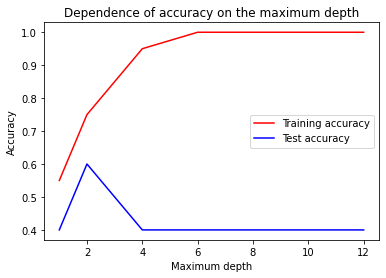


The tree with a depth of 2 gave the best test accuracy of 0.6


In [131]:
def get_dc_accuracy(d=4):
  clf = DecisionTreeClassifier(max_depth=d)
  clf.fit(X_train, y_train)

  y_pred_train = clf.predict(X_train)
  y_pred_test = clf.predict(X_test)
  return accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

depths = [1, 2, 4, 6, 8, 10, 12]
accuracies_train = []
accuracies_test = []
best_acc, best_depth = 0, 0
for d in depths:
  acc_train, acc_test = get_dc_accuracy(d)
  accuracies_train.append(acc_train)
  accuracies_test.append(acc_test)

  if acc_test > best_acc:
    best_acc = acc_test
    best_depth = d

plt.plot(depths, accuracies_train, color ='red') 
plt.plot(depths, accuracies_test, color ='blue') 
plt.title("Dependence of accuracy on the maximum depth") 
plt.ylabel('Accuracy') 
plt.xlabel('Maximum depth') 
plt.legend(['Training accuracy', 'Test accuracy'])
plt.show()

print(f"\nThe tree with a depth of {best_depth} gave the best test accuracy of {best_acc}")

Increasing the maximum depth leads to the model overfitting as seen in the plots above. As can be seen, the two plots start to diverge at max depth = 2.



---

**Question 2.3**

---



Decision trees tend to overfit when max depth is high. As seen in the previous plot, the training error is zero from a max depth of 5, which means that the variance is high.



---

**Question 2.4**

---



In [132]:
from sklearn import tree
import graphviz
from PIL import Image

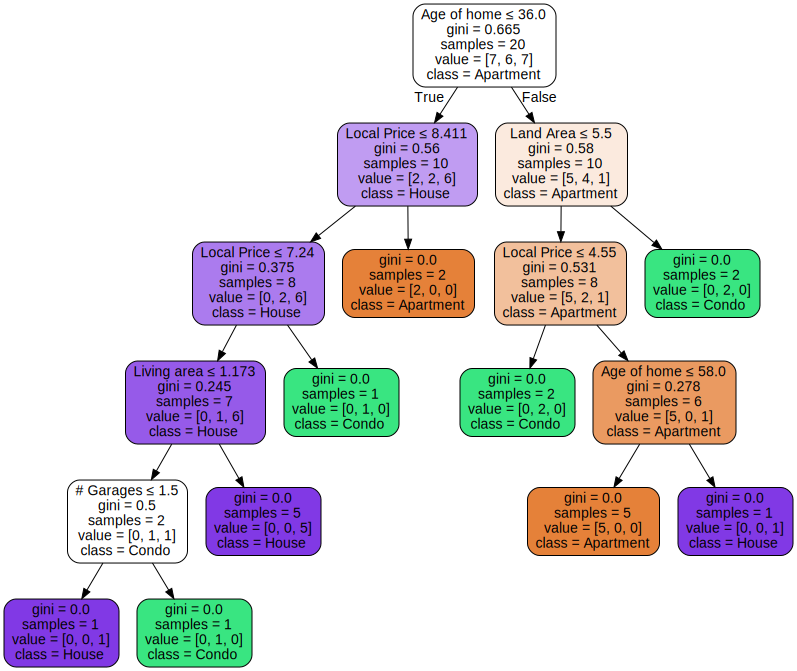

In [133]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
 
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X_train.columns, class_names=['Apartment', 'Condo','House'], filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

**The path is outlined using the red arrows on the image below. And the class is Apartment**

---



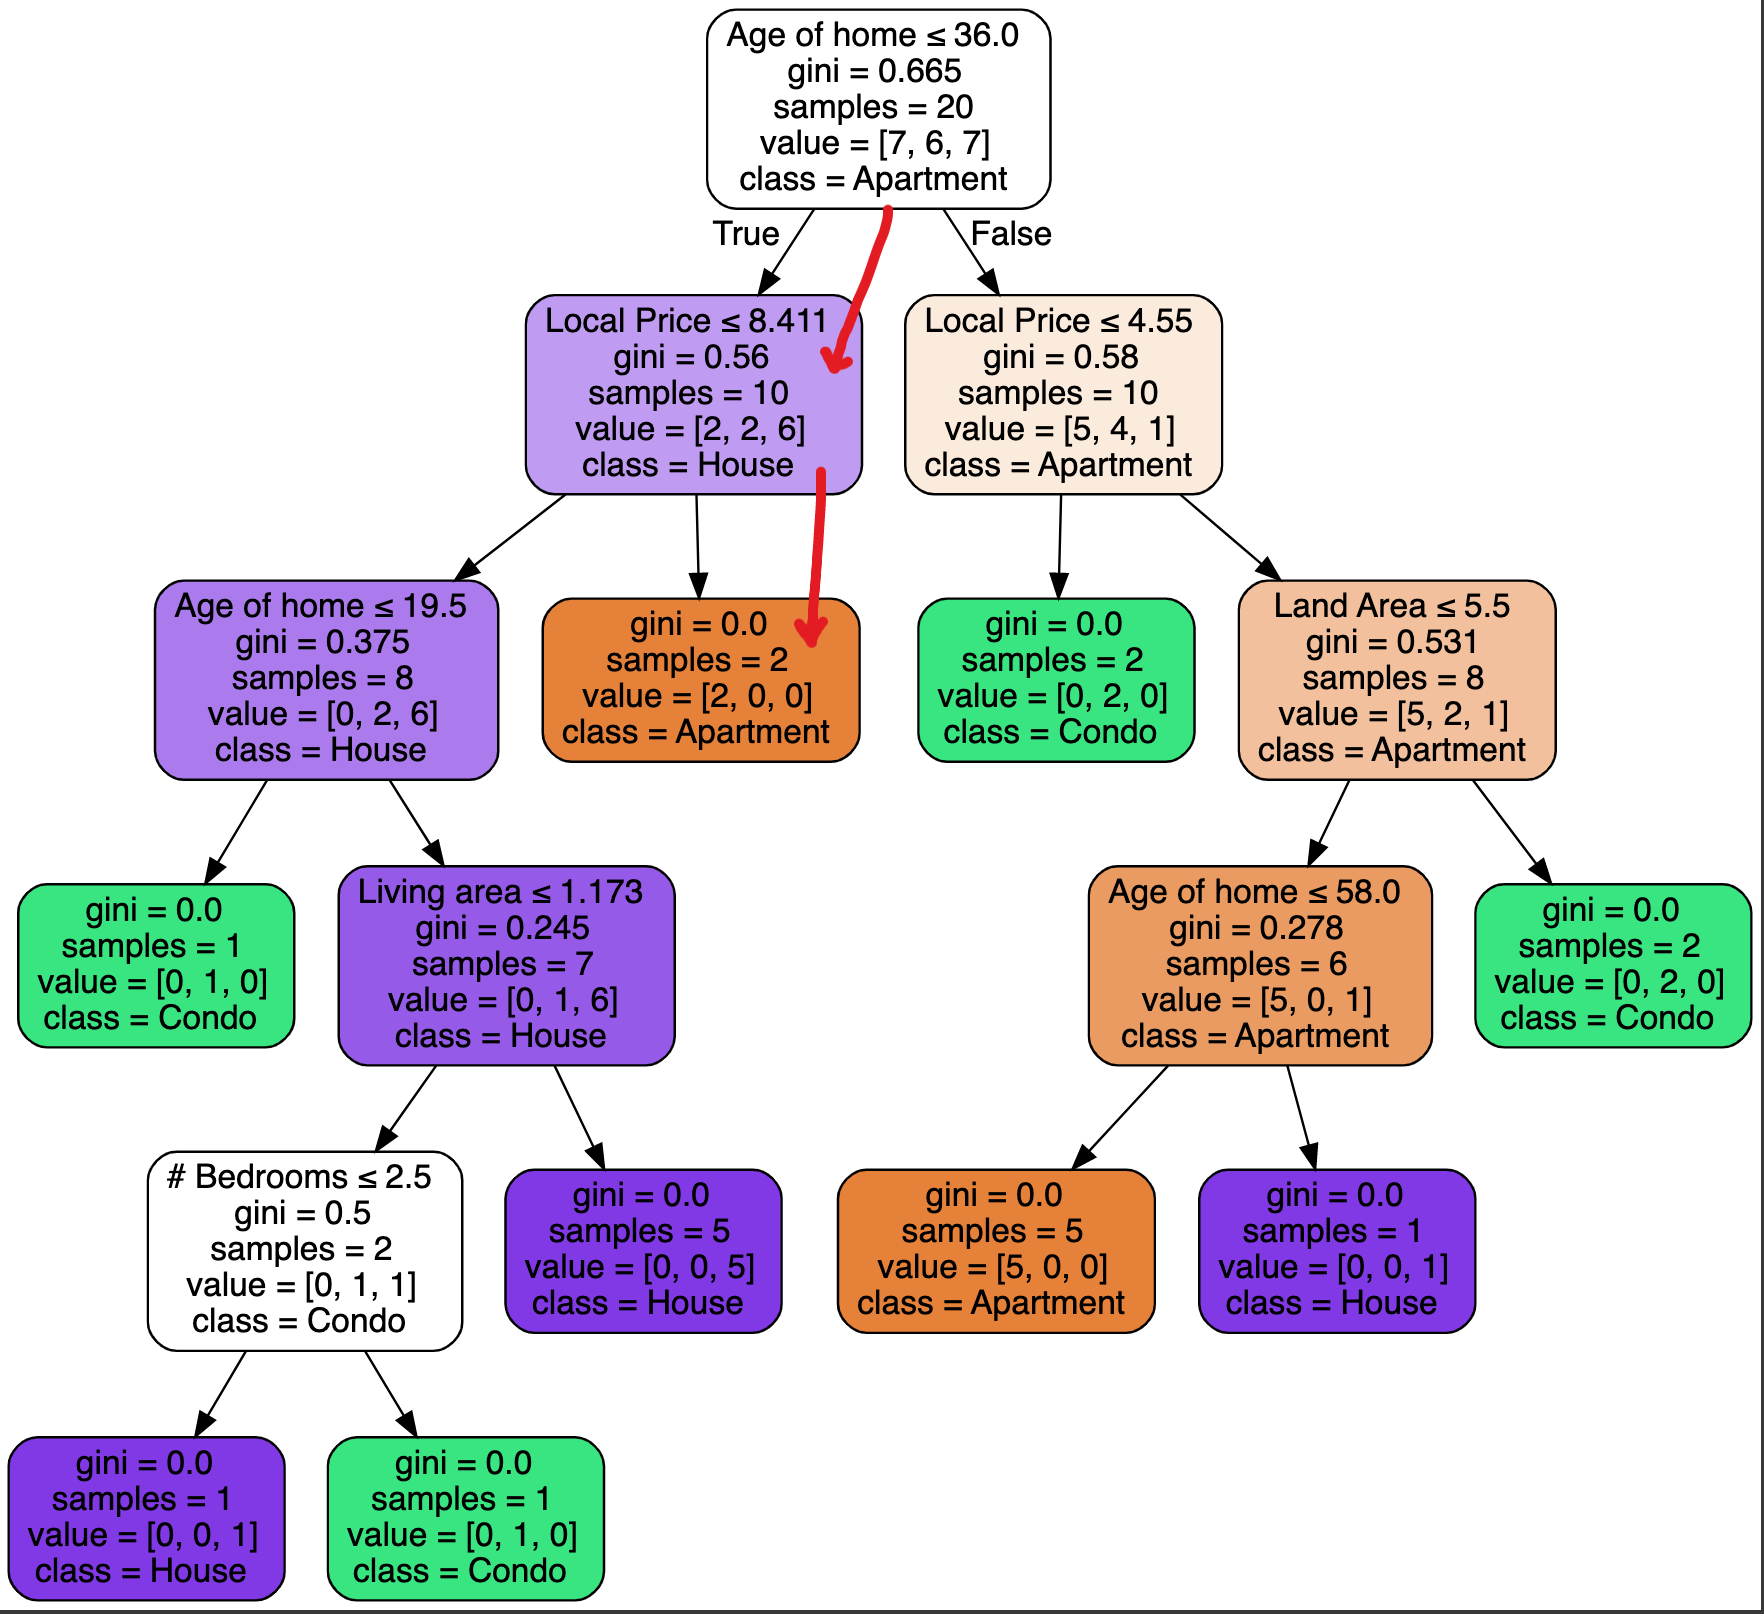

In [134]:
image = Image.open(data_path + "Q4_answer.png")
image



---
# Question 3

---




In [135]:
from scipy.stats import mode

class MyKNeighborsClassifier():
  def __init__(self, n_neighbors=5):
    self.n_neighbors = n_neighbors

  def fit(self, X, y):
    self.X_train = X.values
    self.y_train = y.values

  def _euclidean_distance(self, point, data):
    return np.sqrt(np.sum((point - data)**2))

  def predict(self, X_test) :
    self.m, self.n = X_test.shape
    
    y_preds = []
    X_test = X_test.values
      
    for i in range(self.m) :
      x = X_test[i]        
      neighbors = np.zeros(self.n_neighbors)
      neighbors = self._get_neighbors(x)
        
      # get the most frequent class in K neighbors
      y_preds.append(mode(neighbors)[0][0]) 
  
    return y_preds
                  
  def _get_neighbors(self, x) :
    euclidean_distances = np.zeros(self.m)
        
    for i in range(self.m):
      euclidean_distances[i] = self._euclidean_distance(x, self.X_train[i])
      
    # sort y_train based on euclidean_distances 
    inds = euclidean_distances.argsort()
    y_train_sorted = self.y_train[inds]
      
    return y_train_sorted[:self.n_neighbors]

  def accuracy_score(self, y_test, y_pred):
    accuracy = sum(y_pred == y_test) / len(y_test)
    return accuracy * 100

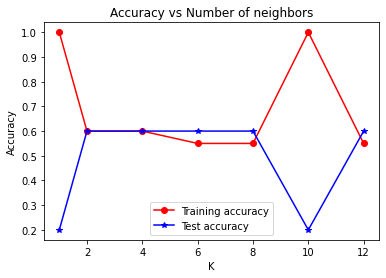

In [136]:
def get_knn_accuracy(k=3):
  clf = MyKNeighborsClassifier(n_neighbors=k)
  clf.fit(X_train, y_train)

  y_pred_train = clf.predict(X_train)
  y_pred_test = clf.predict(X_test)
  return accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

accuracies_train, accuracies_test = [], []
best_acc, best_k = 0, 0
ks = [1, 3, 5, 7, 9, 1, 13]

for k in ks:
  acc_train, acc_test = get_knn_accuracy(k)
  accuracies_train.append(acc_train)
  accuracies_test.append(acc_test)

  if acc_test > best_acc:
    best_acc = acc_test
    best_k = k

plt.plot(depths, accuracies_train, color ='red', marker='o') 
plt.plot(depths, accuracies_test, color ='blue', marker='*') 
plt.title("Accuracy vs Number of neighbors") 
plt.ylabel('Accuracy') 
plt.xlabel('K') 
plt.legend(['Training accuracy', 'Test accuracy'])
plt.show()

The above plot shows that there is a very high variance at lesser values of k which results to the model overfitting to the training data. The variance reduces as the value of k is increased. Predictions on test was constant from k = 2 to k = 8, before it dropped and then started increasing at k = 10. The best accuracy gotten on the test data is 60%